In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [3]:
df=pd.read_csv("train.csv")
df.head()

,id,breath_id,R,C,time_step,u_in,u_out,pressure
0,1,1,20,50,0.000000,0.083334,0,5.837492
1,2,1,20,50,0.033652,18.383041,0,5.907794
2,3,1,20,50,0.067514,22.509278,0,7.876254
3,4,1,20,50,0.101542,22.808822,0,11.742872
4,5,1,20,50,0.135756,25.355850,0,12.234987


In [22]:
df.isna().sum()

id           0
breath_id    0
R            0
C            0
time_step    0
u_in         0
u_out        0
pressure     0
dtype: int64

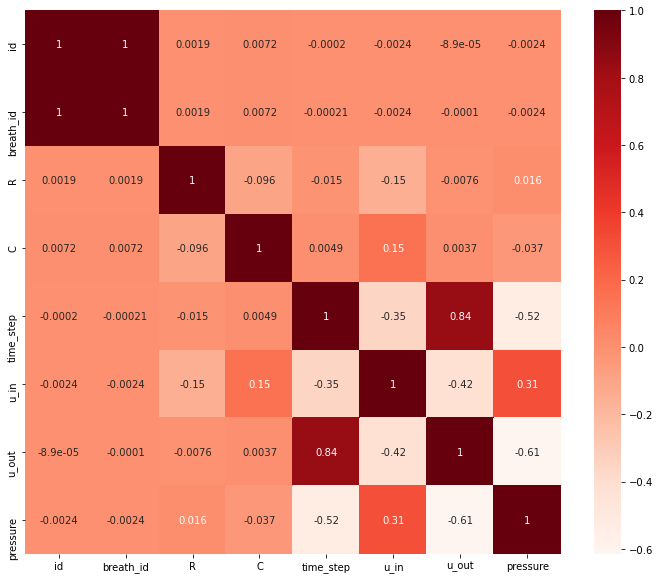

In [7]:
plt.figure(figsize=(12,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [9]:
cor_target = abs(cor["pressure"])
relevant_features = cor_target[cor_target>0.3]
relevant_features

time_step    0.524829
u_in         0.308136
u_out        0.614910
pressure     1.000000
Name: pressure, dtype: float64

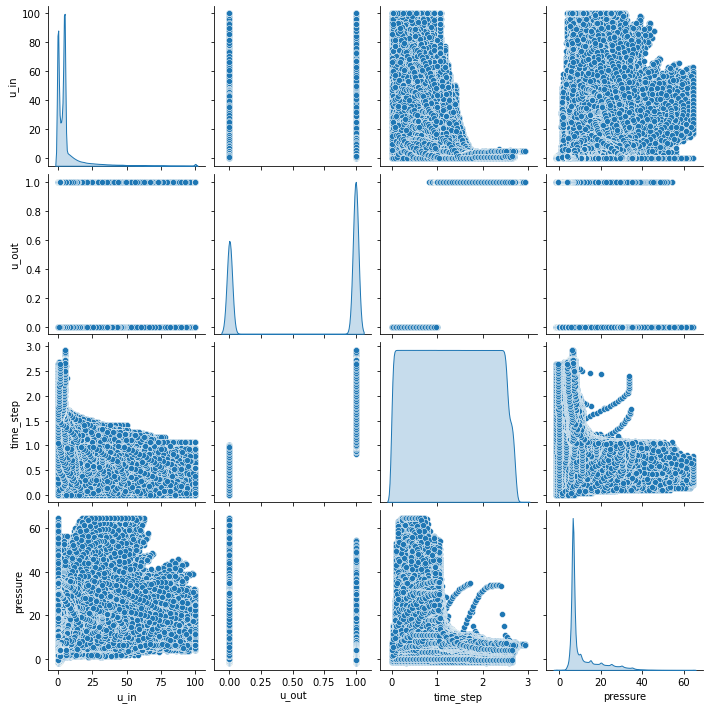

In [25]:
df=df[["u_in","u_out","time_step","pressure"]]
sns.pairplot(df, diag_kind='kde')

In [13]:
X=df[["u_in","u_out","time_step"]]
Y=df["pressure"]
X=np.array(X)
Y=np.array(Y)

In [14]:
# train-test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [27]:
reg=RandomForestRegressor(max_depth=2,random_state=0)
reg.fit(X_train,Y_train)
reg.score(X_test,Y_test)

0.5337803283100884